In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s gdrive/'Team Drives'/'Data Mining Team'/ gdata

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pickle
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.externals import joblib
import matplotlib.pyplot as plt

In [0]:
#Read tokenized database
df = pickle.load(open("gdata/release/ModifiedData_wTokenized.pkl", 'rb'))

#Oversample - same as train dataset
ros = RandomOverSampler(random_state=42)
dfType = df.dtypes.apply(lambda x: x.name).to_dict()
df_ros, _ = ros.fit_resample(df, df['Target'])
df = pd.DataFrame(df_ros, columns=df.columns).astype(dfType)

In [0]:
#Train-test split
y = df['Target']
X = df.drop(['Target'], axis=1)

# Split the train data into X_train and y_train datasets in 80:20 ratio.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [0]:
#Load already trained model. The model is a pipeline, so we are operating on reviewContent and not tokenized.
model = joblib.load('gdata/release/Naive_Bayes_GS.skmodel')

pred_prob = model.predict_proba(X_test['reviewContent'])

In [19]:
import numpy as np
pred_prob

0.5

0.864004944840516


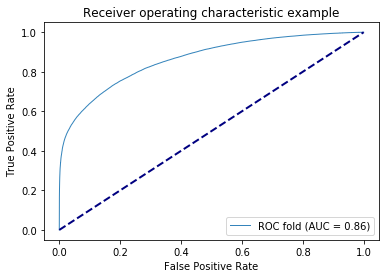

In [6]:
fpr, tpr, thresholds = roc_curve(y_test, [x[1] for x in pred_prob], pos_label=1)


roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.9,
          label='ROC fold (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()